In [1]:
import torch
import matplotlib.pyplot as plt

%matplotlib widget

/home/msc5/.local/lib/python3.9/site-packages/mpl_toolkits/mplot3d/proj3d.py:151: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return np.array([xs, ys, zs, np.ones_like(xs)])
/home/msc5/.local/lib/python3.9/site-packages/mpl_toolkits/mplot3d/proj3d.py:151: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([xs, ys, zs, np.ones_like(xs)])


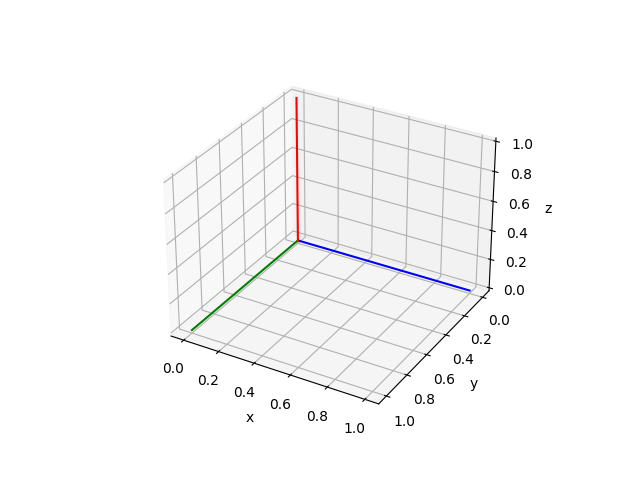

In [36]:
ax = plt.figure().add_subplot(projection='3d')
ax.invert_yaxis()

def axes(ax: plt.Axes, origin: torch.Tensor, basis: torch.Tensor):
    origin = origin[:, None].repeat(1, 3)
    axes = torch.stack([origin, basis], dim=-1)
    ax.plot(*axes[0], color='blue')
    ax.plot(*axes[1], color='green')
    ax.plot(*axes[2], color='red')

axes(ax, torch.zeros(3), torch.eye(3))

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()